# Apache Spark Introduction
In this class we talk about Spark framework and we will overview his components.

## Summary
- <a href='#1'>1. Context and Motivation</a>
- <a href='#2'>2. Apache Spark</a>
    - <a href='#2.1'>2.1.  Spark Components</a>
    - <a href='#2.2'>2.2.  Spark Applications</a>
    - <a href='#2.3'>2.3.  Spark Session</a>
    - <a href='#2.4'>2.4.  DataFrames</a>
    - <a href='#2.5'>2.5.  Partitions</a>
    - <a href='#2.6'>2.6.  Transformations</a>
    - <a href='#2.7'>2.7.  Lazy Evaluation</a>
    - <a href='#2.8'>2.8.  Actions</a>
    - <a href='#2.9'>2.9.  Spark UI</a>
    - <a href='#2.10'>2.10.  SQL</a>
- <a href='#3'>3.  Exercises</a>
- <a href='#3'>4.  References</a>
    

# <a id='1'>1.Context and Motivation</a>

**Why do we need spark?** 

Over the year's computers became faster every year through processor speed increases year by year computers processes more and more information, however most of the applications was design to run only on a single processor. 
The trend of faster computers every year stopped due to hard limits. The hardware developers switch to adding more parallel CPU processing all running at the same time. This change leads to that applications needed to be modified to add parallelism in order to run faster witch set stage for new programming models such **Apache Spark**. 

**Apache Spark** is an open-source distributed general-purpose cluster-computing framework. Spark provides an interface for programming entire clusters with implicit data parallelism and fault tolerance.

 # <a id='2'>2. Apache Spark</a>

 ## <a id='2.1'>2.1. Spark Components</a>
 Spark includes multiple components, each of these components are described below:

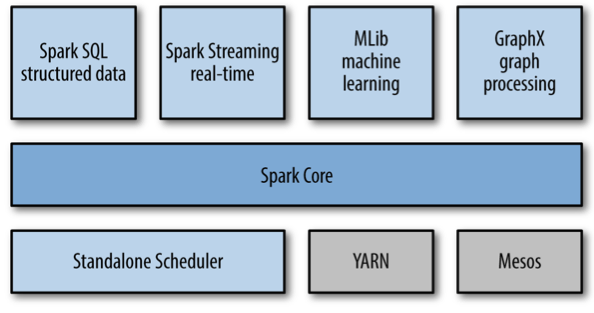

### Spark Core
Spark Core contains basic Spark functionalities required for running jobs and needed by other components.  
The most  important  of  these  is  the  **resilient distributed dataset(RDD)**, which is the main element of the Spark API. It’s an abstraction of a distributed collection of items with **operations and transformations** applicable to the dataset. It’s resilient because it’s capable of rebuilding datasets in case of node failures.

### Spark SQL
Spark SQL provides functions for manipulating large sets of distributed, structured data using an SQL subset supported by Spark and **Hive SQL (HiveQL)**. Spark SQL can also be used for **reading and writing data** to and from various structured formats and data sources, such as JavaScript Object Notation (JSON) files, Parquet files (an increasingly popular file format that allows for storing a schema along with the data), relational databases, Hive, and others.  
Operations on DataFrames and DataSets at some point translate to operations on RDDs and execute as ordinary Spark jobs.   
Spark SQL provides a query optimization framework called Catalyst that can be extended by custom optimization rules.

### Spark Streaming
Spark Streaming is a framework for ingesting real-time streaming data from various sources. The supported streaming sources include HDFS, Kafka, Flume, Twitter, ZeroMQ, and custom ones. Spark Streaming operations recover from failure automatically, which is important for online data processing. Spark Streaming represents streaming data using discretized streams(DStreams), which periodically create RDDs containing the data that came in during the last time window. Spark Streaming can be combined with other Spark components in a single program, unifying real-time processing with machine learning, SQL, and graph operations. This is something unique in the Hadoop ecosystem. And since Spark 2.0, the new StructuredStreaming API makes Spark streaming programs more similar to Spark batch programs.

### Spark MLib
Spark MLlib is a library of machine-learning algorithms grown from the MLbase project at UC Berkeley. Supported algorithms include logistic regression, naïve Bayes classification, support vector machines (SVMs), decision trees,  random  forests, linear regression, and k-means clustering. Spark  MLlib  handles  machine-learning models used for  transforming  datasets, which are represented as RDDs or DataFrames.

### Spark GraphX
Graphs are  data  structures  comprising  vertices  and  the  edges  connecting  them. GraphX  provides  functions  for  building  graphs, represented as graph RDDs: EdgeRDD and VertexRDD. GraphX contains implementations of the most important algorithms of graph theory, such as page rank, connected components, shortest paths, SVD, and  others.

 ## <a id='2.2'>2.2. Spark Applications</a>

  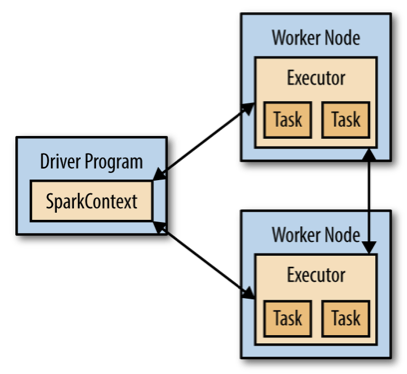

Spark applications consist of a **Driver Process/program** and a set of **executor processes**:

 **Driver process:**
 
   * Run the main function.
   * Maintain information about spark application.
   * Responding to the user program or input. 
   * Analysing, Distributing, and scheduling work across executors.
   
**Executor process:**
 
   * Responsible for carrying out the work that driver assigns to them.
   * Executing the code assign to it by the driver. 
   * Reporting the state of the computation on that executor back to driver node.
   
### Note
There is two modes **Cluster mode** and **Local mode** In Cluster mode, Driver and executors are processes that can live in the same machine or different machines. In Local mode driver and executors run (as threads) on your own computer.

## <a id='2.3'>2.3. Spark Session</a>
 
Spark SessionSession instance is the way Sparks execute user defined manipulations across the cluster.   
To call spark Session object use `spark` command.

In [1]:
print(spark) # Spark Session Object

In [2]:
spark

In [3]:
# Create a data Range of numbers:
# This range of numbers represents a distributed collection. Each part of this 
# range of numbers exists on a different executor.
numbers_to_n = spark.range(1000000).toDF("Number")

In [4]:
print(numbers_to_n)

DataFrame[Number: bigint]


 ## <a id='2.4'>2.4. Dataframes</a>
 Dataframe is the most common structed and simply represents  a table of data with rows and columns.  
 The list that defines columns and the types within those columns is called the schema.
 Spark Dataframes can span thousands of computers.  
 
 ### Note  
 Spark has multiple core abstractions: Datasets, Dataframes, SQL Tables and Resilient Distributed Datasets(RDD). These abstractions all represent distributed collections of Data.

 

In [5]:

columns = ['id', 'dogs', 'cats']
vals = [
     (1, "bulldog", "persian"),
     (2, "German Shepherd", "Siamese")
]

# create DataFrame
df = spark.createDataFrame(vals, columns)

In [6]:
df.printSchema() # see the schema

root
 |-- id: long (nullable = true)
 |-- dogs: string (nullable = true)
 |-- cats: string (nullable = true)



 ## <a id='2.5'>2.5. Partitions</a>
 
 To allow every executor perform work in parallel, Spark breaks up the data into chunks called partitions.
 Partition is a collection of rows that sits on one physical machine in your cluster. 
 
 If we have multiple partitions but only one executor Spark will have a parallelism of only one because there is only one computation resource.  
 
 If we have one partitions spark will have a parallelism of only one even if we have thousands of executors.  
 
 ### Note
 In Dataframes we don't (for the most part) manipulate partitions individually, we simply specify high level transformations of data in the physical partitions, and spark determines how this work will actually execute on the cluster.

 ## <a id='2.6'>2.6. Transformations</a>
 
 In Spark core data structures are **Immutable**(cannot be changed after they're created).   
 To "change" a Dataframe we need to instruct spark how to modify it to do what we want. these are called transformations  

In [7]:
divis_by_two = numbers_to_n.where("number % 2 = 0") # Why didn't return the output?

### Types of transformations
* Narrow dependencies -> Each input contribute only one output partition. All performed in memory.  
 E.g.: **Map**, **Filter**
* Wide dependencies -> Each input partitions contributing to many output partitions. Spark writes the result to disk.   
 E.g.: **GroupByKey**, **ReduceByKey**


#### Narrow Transformations

* **map(func)** -> Return a new distributed dataset formed by passing each element of the source through a function `func`.
* **filter(func)** -> Return a new dataset formed by selecting those elements of the source on which `func` returns true.

### Read from a Dataset

The dataset used in this class is on the downloaded items in folder.   
We need to put the file in hdfs to access it, in order to do that run the command:

    `hdfs dfs -put <filename>`

In [8]:
flights = sc.textFile("2015-summary.csv")
rows = flights.map(lambda line: line.split(",")) # Map example

In [9]:
rows.take(5)

[['DEST_COUNTRY_NAME', 'ORIGIN_COUNTRY_NAME', 'count'],
 ['United States', 'Romania', '15'],
 ['United States', 'Croatia', '1'],
 ['United States', 'Ireland', '344'],
 ['Egypt', 'United States', '15']]

In [10]:
rows.filter(lambda line: "Romania" in line).collect() ## Filter Example

[['United States', 'Romania', '15'], ['Romania', 'United States', '14']]

#### Wide Transformations
* **GroupByKey(numPartitions)** -> When called on a dataset of (K, V) pairs, returns a dataset of (K, Iterable\<V>) pairs.
* **ReduceByKey(numPartitions)** -> When called on a dataset of (K, V) pairs, returns a dataset of (K, V) pairs where the values for each key are aggregated using the given reduce function func, which must be of type (V,V) => V. Like in groupByKey, the number of reduce tasks is configurable through an optional second argument.

In [11]:
origin = rows.map(lambda n: (n[0],n[1] )).groupByKey() # Group by orgin key

In [12]:
origin.take(5)

[('DEST_COUNTRY_NAME', <pyspark.resultiterable.ResultIterable at 0x117737cc0>),
 ('United States', <pyspark.resultiterable.ResultIterable at 0x117906080>),
 ('Costa Rica', <pyspark.resultiterable.ResultIterable at 0x117906ef0>),
 ('Anguilla', <pyspark.resultiterable.ResultIterable at 0x117906eb8>),
 ('Algeria', <pyspark.resultiterable.ResultIterable at 0x117906f98>)]

 ## <a id='2.7'>2.7. Lazy Evaluation</a>
 
 Lazy evaluation means that spark will wait until the very last moment to execute the graph of computation instructions.
 In spark we build a plan of transformations that we would like to apply to the data. By waiting until the last moment to execute the code. Spark compiles the plan and optimize the entire flow end to end.

In [13]:
divis_by_two.explain() # or divis_by_two.explain(extended=True)

== Physical Plan ==
*(1) Project [id#0L AS Number#2L]
+- *(1) Filter ((id#0L % 2) = 0)
   +- *(1) Range (0, 1000000, step=1, splits=4)


 ## <a id='2.8'>2.8. Actions</a>
 
 Transformations allow us to build our logical transformation plan and trigger the computation. It's like the play button. 
 
 ### Kinds of actions:
* Actions to view Data in the console.
* Actions to collect data to native objects in the respective language.
* Actions to write to output data sources.


 **Example Actions**:
 * **reduce(func)** -> Aggregate the elements of the dataset using a function func (which takes two arguments and returns one). The function should be commutative and associative so that it can be computed correctly in parallel.
 * **count()** -> Return the number of elements in the dataset.
 * **take(n)** -> Return an array with the first n elements of the dataset.
 * **first()** -> Return the first element of the dataset (similar to take(1)).


In [14]:
divis_by_two.count()

500000

In [15]:
divis_by_two.take(5)

[Row(Number=0), Row(Number=2), Row(Number=4), Row(Number=6), Row(Number=8)]

In [16]:
divis_by_two.first()

Row(Number=0)

 ## <a id='2.9'>2.9. Spark UI</a>
 With Spark UI you can monitor the progress of a job. Usually Spark UI is available on port 4040 of the driver node.   
 Spark displays information about the state of spark jobs, its environment and cluster state.
 It is very useful for tuning and debugging.

In [17]:
spark.sparkContext.uiWebUrl # Check where spark ui is running

'http://192.168.1.101:4043'

 ## <a id='2.10'>2.10. SQL and DataFrames</a>
 Spark can run the same transformations regardless of the language in the exact same way.  
 Spark will compile the logic to an underlying plan.
 
 **NOTE**  
 For the next exercises we will use flight Data from the United states Bureau of Transportation Statistics 

In [18]:
# load a dataset
# create a dataframe 
flight_data_2015 = spark.read.option("inferSchema","true").option("header","true").csv("2015-summary.csv")

In [19]:
flight_data_2015.take(5)# first three lines of the dataset

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62)]

In [20]:
flight_data_2015.sort("count").explain() ## check the spark physical plan of count

== Physical Plan ==
*(2) Sort [count#28 ASC NULLS FIRST], true, 0
+- Exchange rangepartitioning(count#28 ASC NULLS FIRST, 200)
   +- *(1) FileScan csv [DEST_COUNTRY_NAME#26,ORIGIN_COUNTRY_NAME#27,count#28] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/Users/hugosantos/Dropbox/BigData1920/Práticas/Aula 3 - Spark Introductio..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string,ORIGIN_COUNTRY_NAME:string,count:int>


In [21]:
# Spark by default has 200 shuffle output partitions. 
# Set partitions to 5
spark.conf.set("spark.sql.shuffle.partitions","5")

In [22]:
# create a view of flight data 
flight_data_2015.createOrReplaceTempView("flight_data_2015")

In [23]:
# SQL WAY
country_name_sql = spark.sql("""SELECT DEST_COUNTRY_NAME, count(1) FROM flight_data_2015 GROUP BY DEST_COUNTRY_NAME""") 

In [24]:
#DATAFRAME WAY
country_name_dataframe = flight_data_2015.groupBy("DEST_COUNTRY_NAME").count() # dataframe way

In [25]:
country_name_sql.explain() # same logical plan

== Physical Plan ==
*(2) HashAggregate(keys=[DEST_COUNTRY_NAME#26], functions=[count(1)])
+- Exchange hashpartitioning(DEST_COUNTRY_NAME#26, 5)
   +- *(1) HashAggregate(keys=[DEST_COUNTRY_NAME#26], functions=[partial_count(1)])
      +- *(1) FileScan csv [DEST_COUNTRY_NAME#26] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/Users/hugosantos/Dropbox/BigData1920/Práticas/Aula 3 - Spark Introductio..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string>


In [26]:
country_name_dataframe.explain() # same logical plan

== Physical Plan ==
*(2) HashAggregate(keys=[DEST_COUNTRY_NAME#26], functions=[count(1)])
+- Exchange hashpartitioning(DEST_COUNTRY_NAME#26, 5)
   +- *(1) HashAggregate(keys=[DEST_COUNTRY_NAME#26], functions=[partial_count(1)])
      +- *(1) FileScan csv [DEST_COUNTRY_NAME#26] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/Users/hugosantos/Dropbox/BigData1920/Práticas/Aula 3 - Spark Introductio..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string>


 ## <a id='3'>3. Exercises</a>

In [27]:
# What is the max count from flight data?
from pyspark.sql.functions import max
flight_data_2015.select(max("count")).show()

+----------+
|max(count)|
+----------+
|    370002|
+----------+



In [28]:
# What are the top 5 destinations countries in data?
top_five = spark.sql("""Select DEST_COUNTRY_NAME, sum(count)
                     as total_destination from flight_data_2015 
                      GROUP BY DEST_COUNTRY_NAME
                      ORDER BY sum(count) desc 
                      limit 5""")

In [29]:
top_five.show()

+-----------------+-----------------+
|DEST_COUNTRY_NAME|total_destination|
+-----------------+-----------------+
|    United States|           411352|
|           Canada|             8399|
|           Mexico|             7140|
|   United Kingdom|             2025|
|            Japan|             1548|
+-----------------+-----------------+



In [30]:
top_five.explain() # Show the plan

== Physical Plan ==
TakeOrderedAndProject(limit=5, orderBy=[aggOrder#62L DESC NULLS LAST], output=[DEST_COUNTRY_NAME#26,total_destination#60L])
+- *(2) HashAggregate(keys=[DEST_COUNTRY_NAME#26], functions=[sum(cast(count#28 as bigint))])
   +- Exchange hashpartitioning(DEST_COUNTRY_NAME#26, 5)
      +- *(1) HashAggregate(keys=[DEST_COUNTRY_NAME#26], functions=[partial_sum(cast(count#28 as bigint))])
         +- *(1) FileScan csv [DEST_COUNTRY_NAME#26,count#28] Batched: false, Format: CSV, Location: InMemoryFileIndex[file:/Users/hugosantos/Dropbox/BigData1920/Práticas/Aula 3 - Spark Introductio..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<DEST_COUNTRY_NAME:string,count:int>


In [31]:
# What is the origin country with more flights?
origin_more_flights = spark.sql("""Select ORIGIN_COUNTRY_NAME, sum(count)
                     as total_origin from flight_data_2015 
                      GROUP BY ORIGIN_COUNTRY_NAME
                      ORDER BY sum(count) desc 
                      limit 1""")

In [32]:
origin_more_flights.show()

+-------------------+------------+
|ORIGIN_COUNTRY_NAME|total_origin|
+-------------------+------------+
|      United States|      411966|
+-------------------+------------+



In [33]:
# What is the destination country with more flights?
dest_more_flights = spark.sql("""Select DEST_COUNTRY_NAME, sum(count)
                     as total_dest from flight_data_2015 
                      GROUP BY DEST_COUNTRY_NAME
                      ORDER BY sum(count) desc 
                      limit 1""")

In [34]:
dest_more_flights.show()

+-----------------+----------+
|DEST_COUNTRY_NAME|total_dest|
+-----------------+----------+
|    United States|    411352|
+-----------------+----------+



## <a id='4'>4. References</a>
https://spark.apache.org/docs/latest/rdd-programming-guide.html


https://transtats.bts.gov/ONTIME/Index.aspx